In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [2]:
def sim(n=1000, T=1000, alpha = 0.9, beta = 0.2, gamma = 0.1, lamb0=1, lamb1=5):
    xk = np.arange(3)   
    Gamma = np.array([[1-gamma, 0, gamma], 
                      [0, 1-gamma, gamma], 
                      [beta/2, beta/2, 1-beta]])
    C_transition = [
        stats.rv_discrete(values=(xk,Gamma[0,])),
        stats.rv_discrete(values=(xk,Gamma[1,])),
        stats.rv_discrete(values=(xk,Gamma[2,])),
    ]
    C = np.zeros(T, np.int64)
    C[0] = 2
    for i in range(T-1):
        C[i+1] = C_transition[C[i]].rvs()
    Z_given_C = np.array([1-alpha, alpha, 0.5]) 
    Z = stats.bernoulli(Z_given_C[C]).rvs(size=[n,T])
    X = stats.poisson(np.where(Z, lamb1, lamb0)).rvs()
    return C,Z,X


C, Z, X = sim(5, 100)

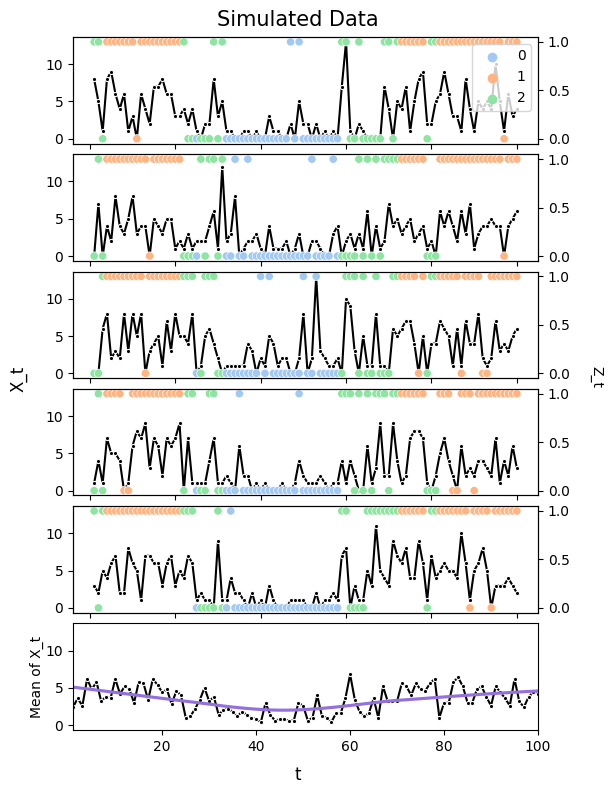

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('bright')

fig, axs = plt.subplots(6,1, sharey=True, figsize = (6,9))

x_plot = list(range(1, 100+1))

for i in range(5):
    y_plot = X[i]
    z_plot = Z[i]
    sns.lineplot(x=x_plot, y=y_plot, marker='o', markersize=3, color='black', ax=axs[i], legend=False)#, label='X')
    axs_ = axs[i].twinx()
    if i == 0:
        sns.scatterplot(x=x_plot, y=z_plot, marker='o', ax=axs_, hue=C, palette = 'pastel', legend=True)#, label='Z')
        plt.legend(title = 'C_t')
        plt.legend(loc='upper right')

    else:
        sns.scatterplot(x=x_plot, y=z_plot, marker='o', ax=axs_, hue=C, palette = 'pastel', legend=False)#, label='Z')

# Plotting the average of X over T
        
fig.suptitle('Simulated Data', fontsize=15, y = 0.91)
fig.supxlabel('t', y = 0.05)
fig.supylabel('X_t')
plt.text(117, 2.3, 'Z_t', rotation = 270)

average_x = np.mean(X, axis=0)
sns.lineplot(x=x_plot, y=average_x, marker='o', markersize=3, color='black', ax=axs[5], legend=False)
sns.regplot(x=x_plot, y=average_x, ax=axs[5], scatter=False, color='mediumpurple', lowess=True)
plt.text(-14, -1.1, 'Mean of X_t', rotation = 90) #horrible, but it works :)

plt.subplots_adjust(hspace = 0.1)

plt.show()

In [ ]:
# Presentation
sns.set_palette('pastel')

# subplots - One for each data file
fig, axs = plt.subplots(10,1, sharey=True, figsize = (10,15))

# for loop for every data file

data_real = [Ex_1,Ex_2,Ex_3,Ex_4,Ex_5,Ex_6,Ex_7,Ex_8,Ex_9,Ex_10]

for i in range(10):

    # Shapes
    T = data_real[i].shape[1]
    n = data_real[i].shape[0]

    # Model
    model = Markov_model(T = T, n = n)
    model.X = data_real[i]
    model.message_pass()
    model.find_most_probable()

    # Data
    x_plot = list(range(1, T+1))
    average_x = np.mean(model.X, axis=0)
    average_z = np.mean(model.Z_guess, axis=0)

    axs_ = axs[i].twinx()
    
    if i == 0:
        
        # Average X_{ti}

        sns.lineplot(x=x_plot, y=average_x, marker='o', markersize=3,
                     color='steelblue', ax=axs[i], linestyle='-', label='X_t')
        
        # Average Z_{ti}
        sns.lineplot(x=x_plot, y=average_z, color='lightpink', ax=axs_, linestyle='--', 
                     label='Mean inferred Z_t')
        # C_t
        sns.scatterplot(x=x_plot, y=average_z, ax=axs_, hue=model.C_guess,
                        style=model.C_guess, legend = False, palette = 'Set2', label = 'C_t')#,markers=['o', 's', '^'])
        
        
        # creating a legend
        
        lines, labels = axs[i].get_legend_handles_labels()
        lines2, labels2 = axs_.get_legend_handles_labels()
        lines_all = lines + lines2
        labels_all = labels + labels2
        
        # removing the label and line of the C_t line
        lines_all.pop()
        labels_all.pop()

        plt.legend(lines_all, labels_all, loc='upper right', title = 'Lines')


    if i == 1:
        # Average X_{ti} 
        sns.lineplot(x=x_plot, y=average_x, marker='o', markersize=3, 
                     color='steelblue', ax=axs[i], linestyle='-')

        # Average Z_{ti} 
        sns.lineplot(x=x_plot, y=average_z, color='lightpink', 
                     ax=axs_, linestyle='--')

        # C_t
        sns.scatterplot(x=x_plot, y=average_z, ax=axs_, hue=model.C_guess, 
                        legend=True, style=model.C_guess, palette = 'Set2')#,markers=['o', 's', '^'])
        plt.legend(loc='upper right')
        plt.legend(title = 'C_t guess')
        
        
    else:
        sns.lineplot(x=x_plot, y=average_x, marker='o', 
                     markersize=3, color='steelblue', ax=axs[i], legend = False)
        sns.lineplot(x=x_plot, y=average_z, markersize=3, 
                     color='lightpink', linestyle='--', ax=axs_, legend = False)
        sns.scatterplot(x=x_plot, y=average_z, ax=axs_, hue = model.C_guess,
                        legend=False, style = model.C_guess, palette = 'Set2')#,markers=['o', 's', '^'])

plt.subplots_adjust(hspace=0.1)

fig.suptitle('Inferred Values', fontsize=20, y=0.91)
fig.supxlabel('t', y = 0.05)
fig.supylabel('Mean X_t')
plt.text(117, 5.9, 'Mean inferred Z_t', rotation=270) 


plt.show()

# TO DO: one legend in first plot

# Logistic Regression

In [30]:
N = 100
n2 = 10
T = 100

#Training set
np.random.seed(42)

C, Z, X = np.empty(shape=(N,T)), np.empty(shape=(N,n2,T)), np.empty(shape=(N, n2,T))
for i in range(N):
    C[i], Z[i], X[i] = sim(n2,T)

#Test set
N_test = 100
C_test, Z_test, X_test = np.empty(shape=(N_test,T)), np.empty(shape=(N_test,n2,T)), np.empty(shape=(N_test, n2, T))
for i in range(N_test):
    C_test[i], Z_test[i], X_test[i] = sim(n2,T)

In [31]:
#Defining regression model
lr_model1 = LogisticRegression(max_iter=10000)

#Model 1 - using all X's
X_model1 = X[:,:,:].reshape((N, 100*n2))
lr_model1.fit(X_model1, C[:,49])   # [49] is C_50 because of zero-indexing
X_model1_test = X_test[:,:,:].reshape((N_test, 100*n2))

In [32]:
#model1
np.mean(lr_model1.predict(X_model1_test) == C_test[:,49])

0.67

In [33]:
lr_model2 = LogisticRegression(max_iter=10000)

#Model 2 - using only neighbouring X's
X_model2 = X[:,:,48:51].reshape((N, 3*n2))
lr_model2.fit(X_model2, C[:,49])
X_model2_test = X_test[:,:,48:51].reshape((N_test, 3*n2))


In [34]:
#model 2
np.mean(lr_model2.predict(X_model2_test) == C_test[:,49])

0.73

In [35]:
lr_model3 = LogisticRegression(max_iter=10000)

#Model 3 - using only descendant X's
X_model3 = X[:,:,49].reshape((N, n2))
lr_model3.fit(X_model3, C[:,49])
X_model3_test = X_test[:,:,49].reshape((N_test, n2))


In [36]:
#model 3
np.mean(lr_model3.predict(X_model3_test) == C_test[:,49])


0.76

In [37]:
lr_model4 = LogisticRegression(max_iter=5000)

#Model 4 - using only neighbouring X's
X_model4 = X[:,:,0:39].reshape((N, 39*n2))
lr_model4.fit(X_model4, C[:,49])
X_model4_test = X_test[:,:,0:39].reshape((N_test, 39*n2))


In [38]:
#model 4
np.mean(lr_model4.predict(X_model4_test) == C_test[:,49])

0.37

## Adjusting alpha

In [27]:
def adjust_vals(valuelist):
    
    
    model1, model2, model3, model4, values = [],[],[],[],[]
    
    
    N = 1000
    n2 = 10
    T = 100

    #Training set
    np.random.seed(42)
    
    
    for val in valuelist:
        
        # Data creation

        C, Z, X = np.empty(shape=(N,T)), np.empty(shape=(N,n2,T)), np.empty(shape=(N, n2,T))
        for i in range(N):
            C[i], Z[i], X[i] = sim(n2,T, alpha = val)

        N_test = 100
        C_test, Z_test, X_test = np.empty(shape=(N_test,T)), np.empty(shape=(N_test,n2,T)), np.empty(shape=(N_test, n2, T))
        for i in range(N_test):
            C_test[i], Z_test[i], X_test[i] = sim(n2,T, alpha = val)


            
            
            
        #Model 1 - using all X's
        lr_model1 = LogisticRegression(max_iter=10000)
        X_model1 = X[:,:,:].reshape((N, 100*n2))
        lr_model1.fit(X_model1, C[:,49])   # [49] is C_50 because of zero-indexing
        X_model1_test = X_test[:,:,:].reshape((N_test, 100*n2))

        accuracy_mod1 = np.mean(lr_model1.predict(X_model1_test) == C_test[:,49])
        model1.append(accuracy_mod1)


        #Model 2 - using only neighbouring X's
        lr_model2 = LogisticRegression(max_iter=10000)
        X_model2 = X[:,:,48:51].reshape((N, 3*n2))
        lr_model2.fit(X_model2, C[:,49])
        X_model2_test = X_test[:,:,48:51].reshape((N_test, 3*n2))

        accuracy_mod2 = np.mean(lr_model2.predict(X_model2_test) == C_test[:,49])
        model2.append(accuracy_mod2)
        

        #Model 3 - using only descendant X's  
        lr_model3 = LogisticRegression(max_iter=10000)
        X_model3 = X[:,:,49].reshape((N, n2))
        lr_model3.fit(X_model3, C[:,49])
        X_model3_test = X_test[:,:,49].reshape((N_test, n2))

        accuracy_mod3 = np.mean(lr_model3.predict(X_model3_test) == C_test[:,49])
        model3.append(accuracy_mod3)


        #Model 4 - using only neighbouring X's
        lr_model4 = LogisticRegression(max_iter=5000)
        X_model4 = X[:,:,0:39].reshape((N, 39*n2))
        lr_model4.fit(X_model4, C[:,49])
        X_model4_test = X_test[:,:,0:39].reshape((N_test, 39*n2))

        accuracy_mod4 = np.mean(lr_model4.predict(X_model4_test) == C_test[:,49])
        model4.append(accuracy_mod4)
                                       
        values.append(val)
    
                                       
    df = pd.DataFrame({
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3,
    'Model 4': model4,
    'Value': values
    })
                                       
    
    return df

        

In [28]:
vals_list = np.arange(0.01,1,0.05)

In [29]:
alpha_df = adjust_vals(valuelist = vals_list)

In [30]:
alpha_df

,Model 1,Model 2,Model 3,Model 4,Value
0,0.79,0.98,0.94,0.40,0.01
1,0.78,0.93,0.87,0.42,0.06
2,0.80,0.88,0.75,0.35,0.11
3,0.79,0.90,0.81,0.28,0.16
4,0.65,0.81,0.62,0.23,0.21
5,0.60,0.70,0.71,0.33,0.26
6,0.58,0.71,0.62,0.34,0.31
7,0.43,0.61,0.43,0.35,0.36
8,0.51,0.61,0.49,0.34,0.41
9,0.39,0.39,0.47,0.30,0.46


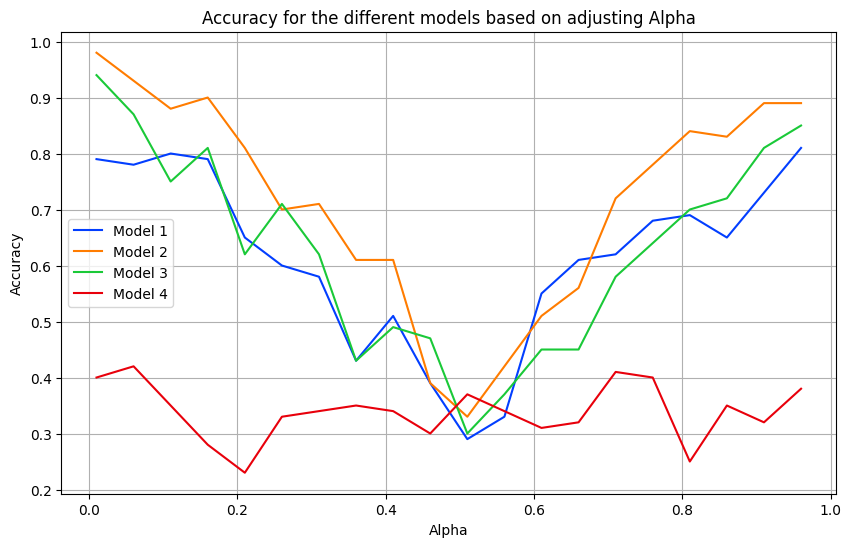

In [33]:
df = alpha_df

# Plot
plt.figure(figsize=(10, 6))

# Plot lines
plt.plot(df['Value'], df['Model 1'], label='Model 1')
plt.plot(df['Value'], df['Model 2'], label='Model 2')
plt.plot(df['Value'], df['Model 3'], label='Model 3')
plt.plot(df['Value'], df['Model 4'], label='Model 4')


plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy for the different models based on adjusting Alpha')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
# old result, doesnt work anymore

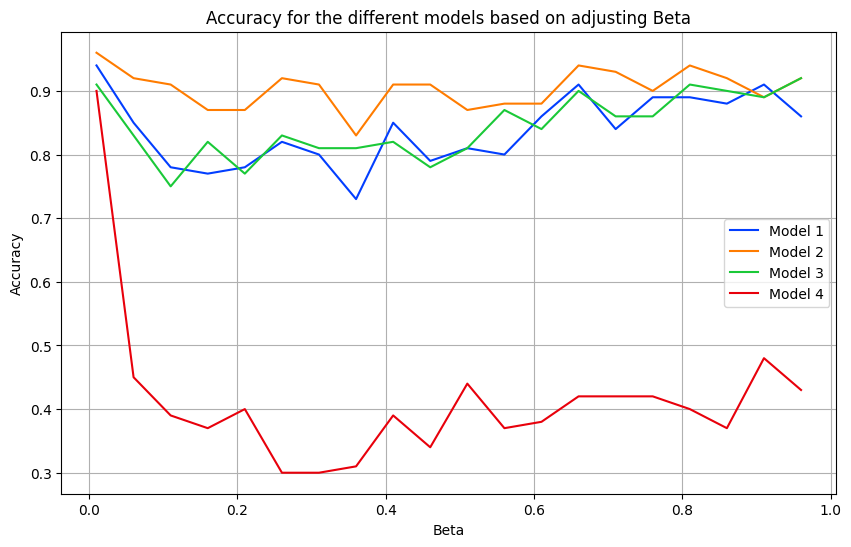

In [20]:
df = beta_df

# Plot
plt.figure(figsize=(10, 6))

# Plot lines
plt.plot(df['Value'], df['Model 1'], label='Model 1')
plt.plot(df['Value'], df['Model 2'], label='Model 2')
plt.plot(df['Value'], df['Model 3'], label='Model 3')
plt.plot(df['Value'], df['Model 4'], label='Model 4')


plt.xlabel('Beta')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Accuracy for the different models based on adjusting Beta')



# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
# code from master, for michaela

# doesn't work here

In [ ]:
# Presentation
sns.set_palette('pastel')


data_real = [Ex_5, Ex_6,Ex_7,Ex_8,Ex_9,Ex_10]
# subplots - One for each data file

fig, axs = plt.subplots(len(data_real),1, sharey=True, figsize = (8,12))


for i in range(len(data_real)):

    # Shapes
    T = data_real[i].shape[1]
    n = data_real[i].shape[0]

    # Model
    model = Markov_model(T = T, n = n)
    model.X = data_real[i]
    model.message_pass()
    model.find_most_probable()

    # Data
    x_plot = list(range(1, T+1))
    average_x = np.mean(model.X, axis=0)
    average_z = np.mean(model.Z_guess, axis=0)
    
    axs_ = axs[i].twinx()
    
    if i == 0:
        
        # Average X_{ti}

        sns.lineplot(x=x_plot, y=average_x, marker='o', markersize=3,
                     color='steelblue', ax=axs[i], linestyle='-', label='X_t')
        
        # Average Z_{ti}
        sns.lineplot(x=x_plot, y=average_z, color='lightpink', ax=axs_, linestyle='--', 
                     label='Mean inferred Z_t')
        # C_t
        sns.scatterplot(x=x_plot, y=average_z, ax=axs_, hue=model.C_guess, style=model.C_guess, markers=['o', 's', 'D'],
                        
                        legend = False, palette = 'Set2', label = 'C_t')
        
       
        # removing old legend
        axs[i].get_legend().remove()
        
        # getting relevant info
        lines, labels = axs[i].get_legend_handles_labels()
        lines2, labels2 = axs_.get_legend_handles_labels()
        lines_all = lines + lines2
        labels_all = labels + labels2
        
        # removing the label and line of the C_t line
        lines_all.pop()
        labels_all.pop()
        
        # creating legend
        plt.legend(lines_all, labels_all, loc='upper right', title = 'Lines')


    if i == 1:
        # Average X_{ti} 
        sns.lineplot(x=x_plot, y=average_x, marker='o', markersize=3, 
                     color='steelblue', ax=axs[i], linestyle='-')

        # Average Z_{ti} 
        sns.lineplot(x=x_plot, y=average_z, color='lightpink', 
                     ax=axs_, linestyle='--')

        # C_t
        sns.scatterplot(x=x_plot, y=average_z, ax=axs_, hue=model.C_guess, markers=['o', 's', 'D'], 
                        legend=True, style=model.C_guess, palette = 'Set2')
        
        
        plt.legend(loc='upper right',title = 'C_t guess')
        
        
    else:
        sns.lineplot(x=x_plot, y=average_x, marker='o', 
                     markersize=3, color='steelblue', ax=axs[i], legend = False)
        sns.lineplot(x=x_plot, y=average_z, markersize=3, 
                     color='lightpink', linestyle='--', ax=axs_, legend = False)
        
        
        sns.scatterplot(x=x_plot, y=average_z, ax=axs_, hue = model.C_guess, markers=['o', 's', 'D'],
                        legend=False, style = model.C_guess, palette = 'Set2')

plt.subplots_adjust(hspace=0.05)

fig.suptitle('Inferred Values', fontsize=15, y=0.91)
fig.supxlabel('t', y = 0.05)
fig.supylabel('Mean X_t')
plt.text(117, 2.9, 'Mean inferred Z_t', rotation=270) 


plt.show()
